# Heart attack hospital admissions:<br> Case characteristics and their relationship to dollar cost per case


### Set up Python libraries
Necessary for the code below to run - run but do not modify this cell

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')

## Data Source

The report examines a sample of 12,843 patients admitted to hospital in New York City with a heart attack.

The data were collected via the Medicare system were downloaded from <a href="https://dasl.datadescription.com/">DASL</a>.

The variables recorded were:
<ul>
<li>CHARGES (dollar cost of stay)
<li>LOS (length of hospital stay in days)
<li>AGE of patient, in years
<li>SEX of patient, in years
<li>DRG - discharge code, not used in this analysis
<li>DIED -coded as 1 if the patient died and 0 if they survived
</ul>

## Data cleaning
Data values exceding plausible ranges (age>110: 2 cases, length of stay>100 days: 1 case) were exculded from the analysis (the remaining data for affected patients were retained in the database). No other outliers or bad data points were identifed, but we note that the cost of stay (CHARGES) was not recorded in 699 out of 12 843 cases.

In [2]:
### Import and clean data
heartAttack=pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/heartAttack.csv')
heartAttack.loc[(heartAttack['LOS']>100),['LOS']]=np.nan
heartAttack.loc[(heartAttack['AGE']>110),['AGE']]=np.nan
print('number of missing values per variable:')
print(heartAttack.isna().sum())

number of missing values per variable:
CHARGES    699
LOS          1
AGE          4
SEX          2
DRG          3
DIED         3
dtype: int64


### Sample Overview

The distributions of each variable are displayed below in <b>Figure 1</b>:

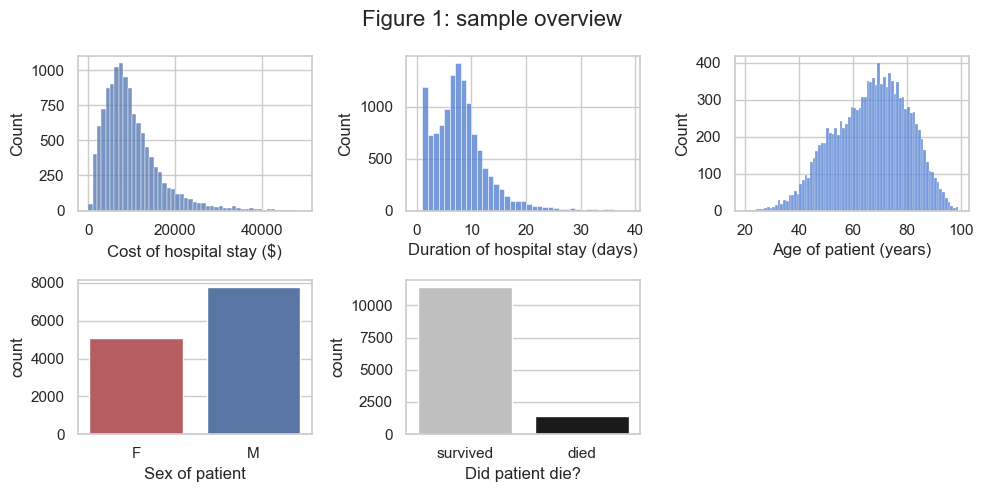

In [3]:
plt.figure(figsize=[10,5])
plt.suptitle('Figure 1: sample overview', fontsize=16)

plt.subplot(2,3,1)
sns.set_palette("muted")
sns.histplot(data=heartAttack, x='CHARGES', bins=range(0,50000,1000))
plt.xlabel('Cost of hospital stay ($)')

plt.subplot(2,3,2)
sns.histplot(data=heartAttack, x='LOS', bins=range(0,40,1))
plt.xlabel('Duration of hospital stay (days)')

plt.subplot(2,3,3)
sns.histplot(data=heartAttack, x='AGE', bins=range(20,100,1))
plt.xlabel('Age of patient (years)')

plt.subplot(2,3,4)
colors = ['r', 'b']# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=heartAttack, x='SEX')
plt.xlabel('Sex of patient')

plt.subplot(2,3,5)
colors = [[0.75,0.75,0.75], 'k']# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=heartAttack, x='DIED')
plt.xlabel('Did patient die?')
plt.xticks(ticks=[0,1],labels=['survived','died'])

plt.tight_layout()

#### Here are some summary statistics for the patient cohort (calculations displayed in the cell below)

<b>Cost of stay:</b> The cost of the hosiptal stay (CHARGES) had a skewed distribution: the median cost was 8445 dollars, and 90\% of patients' stays cost less than 18,000 dollars, but the most expensive 2\% of stays cost over 30,000 dollars

<b>Duration of stay:</b> The duration of the hosiptal stay (LOS) also had a skewed distribution: the median duration was 7 days, and 90\% of patients stayed 13 days or less, but the longest 2\% of stays were over 22 days. Notably there was a spike of patients staying only one day, containing 9% of cases.

<b>Age of patients:</b> Most patients were older adults; the median age (AGE) was 67 but 200% of patients were under 54. Approximately and 20% were over 80 and 2% were over 90.

<b>Sex of patients</b>: Approximately 60% of the patients were male (column name: SEX)

<b>Survived/Died</b>: Approximately 11% of patients sadly died during their stay in hospital (column name: DIED)

The cell below contains some calculations for the summary statistics

In [4]:
print('quantiles:')
print(heartAttack[['CHARGES','LOS','AGE']].quantile([.2, .5, .8, .9, .95, .98, .99]))

print('proportion of cases staying only one day:')
print(len(heartAttack[heartAttack['LOS']<=1])/len(heartAttack))

print('proportion male:')
print(len(heartAttack[heartAttack['SEX']=='M'])/len(heartAttack))

print('proportion died:')
print(len(heartAttack[heartAttack['DIED']==1])/len(heartAttack))

quantiles:
         CHARGES   LOS   AGE
0.20   4764.8000   3.0  54.0
0.50   8445.0000   7.0  67.0
0.80  13851.0000  11.0  79.0
0.90  17931.6000  13.0  83.0
0.95  22557.7280  17.0  87.0
0.98  29061.8800  22.0  91.0
0.99  34102.7504  26.0  93.0
proportion of cases staying only one day:
0.09303955154157584
proportion male:
0.6056524447212707
proportion died:
0.10977888508252881


### Further analysis of costs will be disagregated by mortality

Focussing now on factors affecting the distribution of charges, we note first that the distribution of charges was different for patients who survived and died (see Figure 2 below), and that this may reflect the different lengths of stay typically associated with these outcomes. Notably, about 40% of patients who died, died on the first day in hospital, whilst 95% of those who survived stayed more than one day.

In [5]:
# breakdown of patients staying only one day in hospital

print('proportion of those who died, who died on day 1 in hospital:')
print(len(heartAttack[(heartAttack['DIED']==1) & (heartAttack['LOS']==1)])/len(heartAttack[(heartAttack['DIED']==1)]))

print('proportion of those who survived, who stayed longer than 1 day in hospital:')
print(len(heartAttack[(heartAttack['DIED']==0) & (heartAttack['LOS']>1)])/len(heartAttack[(heartAttack['DIED']==0)]))

proportion of those who died, who died on day 1 in hospital:
0.4099290780141844
proportion of those who survived, who stayed longer than 1 day in hospital:
0.9459364884961946


<b>Figure 2</b> below shows the distribution of costs and length of stay separately for the patients who survived and died:

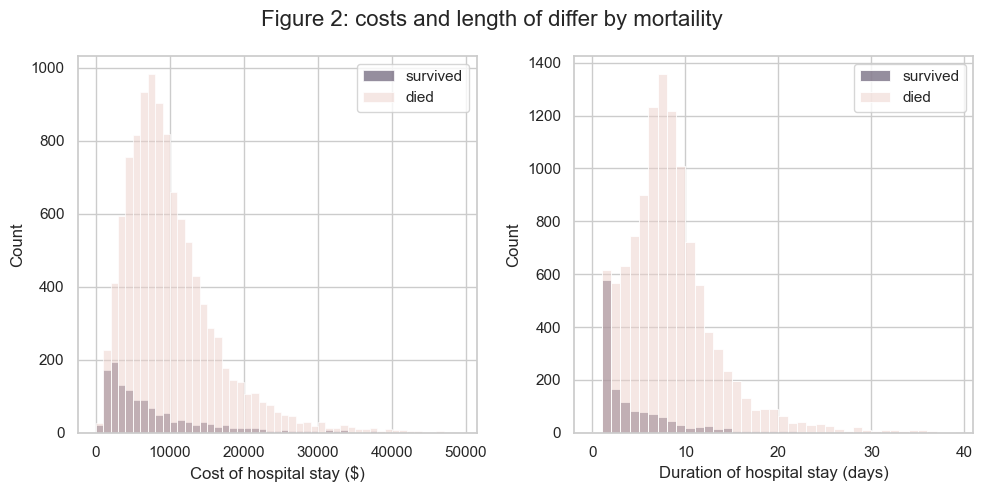

In [6]:
# plot cost and duration of stay disaggregated by mortality
plt.figure(figsize=[10,5])
plt.suptitle('Figure 2: costs and length of differ by mortaility', fontsize=16)

plt.subplot(1,2,1)
sns.histplot(data=heartAttack, x='CHARGES', bins=range(0,50000,1000), hue='DIED')
plt.xlabel('Cost of hospital stay ($)')
plt.legend(['survived','died'])

plt.subplot(1,2,2)
sns.histplot(data=heartAttack, x='LOS', bins=range(0,40,1), hue='DIED')
plt.xlabel('Duration of hospital stay (days)')
plt.legend(['survived','died'])

plt.tight_layout()

For clarity, further analysis of costs will focus only on the patients who survived. 

In [7]:
# create a new dataframe containing only patients who survived
survived = heartAttack[heartAttack['DIED']==0]

### Cost of stay is driven by duration of stay

Focussing on patients who survived, we see that, perhaps unsurprisingly, longer hospital stays are associated with higher costs (Spearman's correlation r = 0.72), and the longest stays and highest costs occur in older patients (see <b>figure 3</b> below).


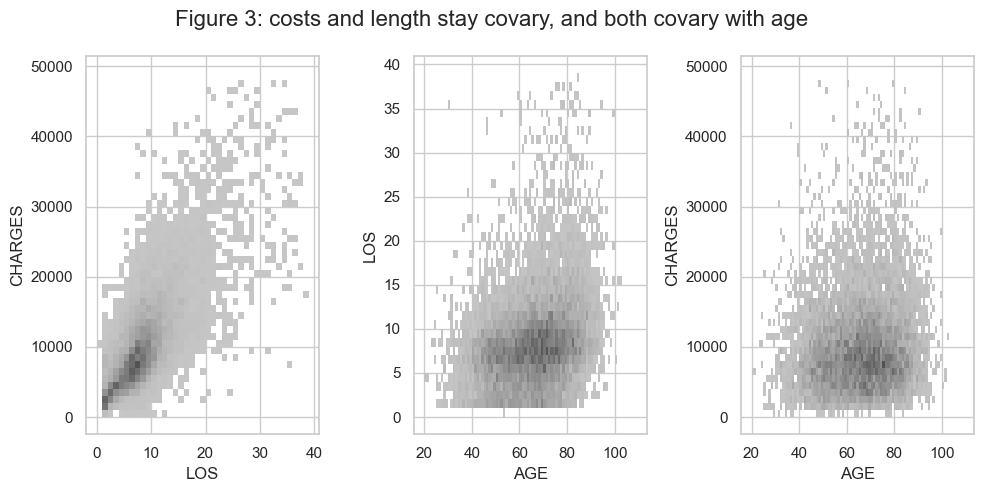

In [8]:
# plot cost and duration of stay disaggregated by mortality
plt.figure(figsize=[10,5])
plt.suptitle('Figure 3: costs and length stay covary, and both covary with age', fontsize=16)

plt.subplot(1,3,1)
sns.histplot(data=survived, x='LOS', y='CHARGES', bins=[range(0,40,1), range(0,50000,1000)])

plt.subplot(1,3,2)
sns.histplot(data=survived, x='AGE', y='LOS', bins=[range(20,110,1), range(0,40,1)])

plt.subplot(1,3,3)
sns.histplot(data=survived, x='AGE', y='CHARGES', bins=[range(20,110,1), range(0,50000,1000)])

plt.tight_layout()

#### From the figure 
we can see that there is a strong link between duration of stay and charges (Spearman's correlation r = 0.72).

<i>Furthermore</i> - 

The patients with the longest hospital stays tended to be older (Spearman's correlation r = 0.27), although for both old and young patients the most common duration of stay was similar (about a week); thus the correlation between age and length of stay is probably driven by a long tail of long-duration stays in older patients.

Similarly, the patients with the highest charges tended to be older (Spearman's correlation r = 0.089), although for both old and young patients the majority of cases cost less than 10,000 dollars, thus the correlation between age and dollar cost stay is probably driven by a long tail of high-cost stays in older patients.

The following calculations support the text in this section:

In [9]:
# generate correlation matrix for cost, duration of stay and age
survived[['CHARGES','LOS','AGE']].corr(method='spearman')

,CHARGES,LOS,AGE
CHARGES,1.000000,0.716863,0.088667
LOS,0.716863,1.000000,0.274533
AGE,0.088667,0.274533,1.000000


### Conclusions

For patients admitted to hospital following a heart attack, there is a wide range of costs; the median dollar cost of the hospital stay is around 8500, and 90% of patients' stays cost less than 18,000 dollars, but the most expensive 2% of stays cost over 30,000 dollars.

Around 90% of patients admitted to hospital with heart attack survive; for those who sadly die, it is common (40% of cases) to die on the day of admission and stays are generally shorter and associated with lower dollar cost than patients who survive. Patients who died were therefore considered a separate subgroup; analysis here focusses on the 90% who survived.

A key factor determining the cost is the duration of the stay in hospital. Longer stays are associated with higher costs, with each day in hospital adding an average of 950 dollars to the bill. Longer, more expensive stays are most common for older patients.

We note that with an aging population in the USA, the frequency of long, high-cost stays in hospital is likely to increase in coming years and advise Medicare to budget for this.
